# Liar-Pants-on-Fire

### БАЗОВЫЙ НАБОР ДАННЫХ ДЛЯ ОБНАРУЖЕНИЯ ФАЛЬШИВЫХ НОВОСТЕЙ

1. ID: уникальный идентификатор для каждого утверждения.
2. Label: метка класса, указывающая на степень правдивости утверждения (например, "false", "half-true", "mostly-true").
3. Statement: само утверждение или новость.
4. Subject: тема, к которой относится утверждение.
5. Speaker: тот, кто сделал утверждение.
6. Job: профессия или должность оратора.
7. State: штат, откуда оратор.
8. Party: политическая партия оратора.
9. Barely_true_counts, False_counts, Half_true_counts, Mostly_true_counts, Pants_on_fire_counts: счетчики предыдущих утверждений оратора, разделенных по их степени правдивости.
10. Context: контекст, в котором было сделано утверждение.

В области data science и машинного обучения определение фейковых новостей — это активно исследуемая область, поскольку она имеет важное значение для общества. Распространение фейковых новостей может вызвать серьезные последствия, включая общественное недовольство, недоверие к СМИ и даже политическую нестабильность. Поэтому важно разработать инструменты и методы для их обнаружения.

Фейковые новости могут быть определены как дезинформация или ложная информация, представленная как реальные новости. Они обычно имеют целью ввести людей в заблуждение и могут быть направлены на достижение определенных политических или экономических целей.

На основе данных, которые мы имеем, целью проекта может быть разработка модели машинного обучения, способной классифицировать высказывания по их истинности.

Такая модель может быть полезна в различных сферах, включая журналистику, социальные сети и сферу проверки фактов (fact-checking). Например, она может быть использована для автоматической фильтрации ложных утверждений в социальных сетях или для помощи журналистам в быстрой проверке фактов.

### Задачи проекта:

В проекте мы решаете задачу классификации политических высказываний. Основная цель проекта заключается в создании модели машинного обучения, которая может классифицировать высказывания на основе текстовых данных и предсказывать метку истинности высказывания. Это может быть полезно для анализа и оценки достоверности политических заявлений.

Основные шаги проекта включают предобработку текстовых данных, извлечение признаков из текста (например, с использованием TF-IDF векторизации), обучение модели классификации на обучающих данных и оценку производительности модели на валидационных данных.

Задача классификации политических высказываний имеет целью предсказать метку истинности высказывания (например, правдивое, ложное, частично верное и т. д.) на основе текстовых данных, чтобы помочь в анализе и интерпретации политических сообщений.

In [1]:
import pandas as pd

# Загрузка датасета
columns = ['ID', 'Label', 'Statement', 'Subject', 'Speaker', 'Job', 'State', 'Party', 
           'Barely_true_counts', 'False_counts', 'Half_true_counts', 'Mostly_true_counts', 
           'Pants_on_fire_counts', 'Context']

train_data = pd.read_csv('train.tsv', delimiter='\t', header=None, names=columns)
test_data = pd.read_csv('test.tsv', delimiter='\t', header=None, names=columns)
valid_data = pd.read_csv('valid.tsv', delimiter='\t', header=None, names=columns)

In [2]:
display(train_data.head())

,ID,Label,Statement,Subject,Speaker,Job,State,Party,Barely_true_counts,False_counts,Half_true_counts,Mostly_true_counts,Pants_on_fire_counts,Context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [3]:
display(valid_data.head())

,ID,Label,Statement,Subject,Speaker,Job,State,Party,Barely_true_counts,False_counts,Half_true_counts,Mostly_true_counts,Pants_on_fire_counts,Context
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


In [4]:
display(test_data.head())

,ID,Label,Statement,Subject,Speaker,Job,State,Party,Barely_true_counts,False_counts,Half_true_counts,Mostly_true_counts,Pants_on_fire_counts,Context
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


Удаляем столбцы,  не являющиеся важными для моделей. Это может помочь уменьшить размер данных, упростить анализ и ускорить обучение модели.

In [5]:
columns_to_drop = ['Barely_true_counts', 'False_counts',
                   'Half_true_counts', 'Mostly_true_counts',
                   'Pants_on_fire_counts', 'ID', 'Subject',
                   'Speaker', 'Job', 'State', 'Context','Party']
train_data = train_data.drop(columns=columns_to_drop)
valid_data = valid_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

LabelEncoder из scikit-learn для преобразования категориальных библиотечных меток (меток) в числовой формат.

Преобразование меток классов в числовой формат необходимым для работы с определенными алгоритмами машинного обучения, которые ожидают числовые значения в качестве входных данных для целевой переменной. Это позволяет эффективно использовать эти данные в процессе обучения моделей и прогнозирования на новых данных.

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data['Label'] = label_encoder.fit_transform(train_data['Label'])
valid_data['Label'] = label_encoder.transform(valid_data['Label'])
test_data['Label'] = label_encoder.transform(test_data['Label'])


In [7]:
display(test_data.head())

,Label,Statement
0,5,Building a wall on the U.S.-Mexico border will...
1,1,Wisconsin is on pace to double the number of l...
2,1,Says John McCain has done nothing to help the ...
3,2,Suzanne Bonamici supports a plan that will cut...
4,4,When asked by a reporter whether hes at the ce...


In [8]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Вывод соответствия значений
for num_value, label_value in reverse_label_mapping.items():
    print(f"Значение {num_value} соответствует \"{label_value}\"")

Значение 0 соответствует "barely-true"
Значение 1 соответствует "false"
Значение 2 соответствует "half-true"
Значение 3 соответствует "mostly-true"
Значение 4 соответствует "pants-fire"
Значение 5 соответствует "true"


In [9]:
# Удаление дубликатов train_data
train_data = train_data.drop_duplicates()
# Удаление дубликатов valid_datadata = v
valid_data.drop_duplicates()
# Удаление дубликатов test_data
test_data = test_data.drop_duplicates()

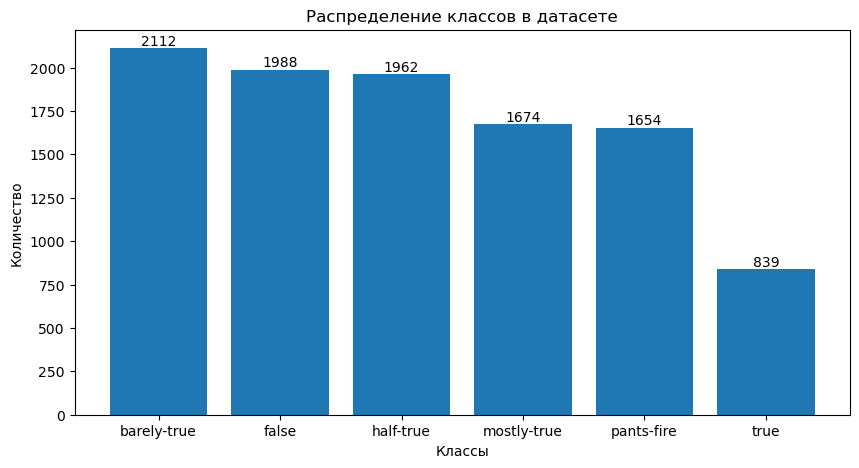

In [10]:
import matplotlib.pyplot as plt

class_distribution = train_data['Label'].value_counts()
class_labels = ['barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire', 'true']

plt.figure(figsize=(10,5))
plt.bar(class_labels, class_distribution.values)
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.title('Распределение классов в датасете')

# Добавляем подписи к столбцам
for i, v in enumerate(class_distribution.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


**Основные шаги, которые необходимы для обработки текста.**

Предобработка текста является важным шагом в подготовке данных для анализа текста или обучения моделей машинного обучения. В данном коде выполняются операции по удалению ненужных символов, приведению текста к нижнему регистру, токенизации, удалению стоп-слов и лемматизации слов. Это помогает снизить размерность данных и сделать текст более структурированным и подходящим для дальнейшей обработки и анализа.

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    cleaned_text = cleaned_text.lower()
    tokens = word_tokenize(cleaned_text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)  # Объединяем токены в строку

# Применяем предобработку к столбцу 'Statement' в train_data
train_data['Statement'] = train_data['Statement'].apply(preprocess_text)
# Применяем предобработку к столбцу 'Statement' в valid_data
valid_data['Statement'] = valid_data['Statement'].apply(preprocess_text)
# Применяем предобработку к столбцу 'Statement' в test_data
test_data['Statement'] = test_data['Statement'].apply(preprocess_text)

print(train_data['Statement'].head())
print(valid_data['Statement'].head())
print(test_data['Statement'].head())



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ольга\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ольга\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    say annies list political group support thirdt...
1    decline coal start started natural gas took st...
2    hillary clinton agrees john mccain voting give...
3    health care reform legislation likely mandate ...
4                 economic turnaround started end term
Name: Statement, dtype: object
0                                  le american working
1    obama sworn office use holy bible instead kura...
2    say organization parading social welfare organ...
3                    say nearly half oregon child poor
4    attack republican various program economic sti...
Name: Statement, dtype: object
0    building wall usmexico border take literally year
1             wisconsin pace double number layoff year
2                say john mccain done nothing help vet
3    suzanne bonamici support plan cut choice medic...
4    asked reporter whether he center criminal sche...
Name: Statement, dtype: object


**Токенизация.**

Токенизация и преобразование текста в последовательности чисел являются важными шагами при подготовке текстовых данных для обучения моделей глубокого обучения. Это позволяет модели работать с числовыми данными вместо текстовых и упрощает процесс обучения и прогнозирования. Кроме того, использование ограниченного числа слов (в данном случае 100) помогает сократить размерность данных и ускорить вычисления.

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

# Создаем экземпляр токенизатора
tokenizer = Tokenizer(num_words=100)

# Обучаем токенизатор на текстах из столбца 'Statement' в train_data
tokenizer.fit_on_texts(train_data['Statement'])

# Преобразуем тексты в последовательности чисел и сохраняем в исходных данных
train_data['Statement'] = tokenizer.texts_to_sequences(train_data['Statement'])
valid_data['Statement'] = tokenizer.texts_to_sequences(valid_data['Statement'])
test_data['Statement'] = tokenizer.texts_to_sequences(test_data['Statement'])

# Выводим словарь токенов
word_indexes = tokenizer.word_index
print(word_indexes)

# Выводим числовое представление текста
print(train_data['Statement'])
print(valid_data['Statement'])
print(test_data['Statement'])


{'say': 1, 'state': 2, 'percent': 3, 'year': 4, 'tax': 5, 'obama': 6, 'president': 7, 'job': 8, 'million': 9, 'people': 10, 'health': 11, 'would': 12, 'u': 13, 'care': 14, 'one': 15, 'new': 16, 'bill': 17, 'country': 18, 'american': 19, 'billion': 20, 'time': 21, 'cut': 22, 'texas': 23, 'every': 24, 'said': 25, 'law': 26, 'republican': 27, 'rate': 28, 'federal': 29, 'voted': 30, 'budget': 31, 'barack': 32, 'since': 33, 'government': 34, 'school': 35, 'plan': 36, 'last': 37, 'pay': 38, 'united': 39, 'wisconsin': 40, 'clinton': 41, 'get': 42, 'cost': 43, 'money': 44, 'first': 45, 'florida': 46, 'city': 47, 'even': 48, 'woman': 49, 'office': 50, 'senate': 51, 'vote': 52, 'day': 53, 'spending': 54, 'public': 55, 'governor': 56, 'dollar': 57, 'america': 58, 'democrat': 59, 'scott': 60, 'obamacare': 61, 'nation': 62, 'insurance': 63, 'increase': 64, 'average': 65, 'support': 66, 'hillary': 67, 'debt': 68, 'house': 69, 'right': 70, 'want': 71, 'dont': 72, 'security': 73, 'medicare': 74, 'gun'

Очистка текста от неалфавитных символов.

In [13]:
print(train_data['Statement'].head())
print(valid_data['Statement'].head())
print(test_data['Statement'].head())

0         [1, 66]
1         [7, 86]
2    [67, 41, 86]
3        [11, 14]
4              []
Name: Statement, dtype: object
0               [19]
1            [6, 50]
2         [1, 4, 25]
3        [1, 88, 81]
4    [27, 84, 36, 3]
Name: Statement, dtype: object
0                 [4]
1         [40, 92, 4]
2                 [1]
3    [66, 36, 22, 74]
4    [98, 26, 83, 60]
Name: Statement, dtype: object


## Логистическая регрессия

Этот код выполняет обучение модели логистической регрессии на тренировочных данных, настраивает гиперпараметры с использованием перекрестной проверки и оценивает производительность модели на валидационных данных с помощью метрик классификации.

In [14]:
import time
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Преобразование меток в числовой формат
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data['Label'])
valid_labels = label_encoder.transform(valid_data['Label'])
test_labels = label_encoder.transform(test_data['Label'])

# Преобразование столбца "Statement" в строки
train_data['Statement'] = train_data['Statement'].astype(str)
valid_data['Statement'] = valid_data['Statement'].astype(str)
test_data['Statement'] = test_data['Statement'].astype(str)


# Создание конвейера с препроцессором и моделью
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Задание сетки параметров для настройки
parameters = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__C': [0.1, 1, 10],
}

# Создание экземпляра GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5)

# Замер времени обучения
start_time = time.time()

# Обучение модели и поиск лучших параметров
grid_search.fit(train_data['Statement'], train_labels)

# Вычисление времени обучения
elapsed_time = (time.time() - start_time) / 60
# Вывод времени обучения
print("Time: {:.2f} minutes".format(elapsed_time))

# Вывод лучших параметров и результатов
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Предсказание классов на валидационных данных
predicted_labels = grid_search.predict(valid_data['Statement'])

# Преобразование числовых предсказанных меток обратно в исходный формат
predicted_labels = label_encoder.inverse_transform(predicted_labels)

# Вычисление метрик
report = classification_report(valid_labels, predicted_labels)

# Вывод метрик
print("Classification Report:")
print(report)


Time: 0.28 minutes
Best Parameters: {'classifier__C': 1, 'vectorizer__ngram_range': (1, 1)}
Best Score: 0.22573030565932214
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.13      0.17       237
           1       0.24      0.46      0.31       263
           2       0.21      0.25      0.23       248
           3       0.26      0.24      0.25       251
           4       0.67      0.02      0.03       116
           5       0.17      0.13      0.15       169

    accuracy                           0.23      1284
   macro avg       0.30      0.20      0.19      1284
weighted avg       0.27      0.23      0.21      1284



## XGBoost 

Данный код реализует модель машинного обучения XGBoost для классификации текстовых данных. 

In [15]:
import time
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

#Создание CountVectorizer с включением стоп-слов
vectorizer = CountVectorizer(stop_words='english')
train_features = vectorizer.fit_transform(train_data['Statement'].astype(str))
valid_features = vectorizer.transform(valid_data['Statement'].astype(str))

#Создание DMatrix для тренировочных и валидационных данных
dtrain = xgb.DMatrix(train_features, label=train_labels)
dvalid = xgb.DMatrix(valid_features, label=valid_labels)

#Задание параметров модели
params = {
'objective': 'multi:softmax',
'num_class': len(label_encoder.classes_),
'eta': 0.1,
'max_depth': 3,
'min_child_weight': 1,
'subsample': 0.8,
'colsample_bytree': 0.8,
'eval_metric': 'merror'
}

#Обучение модели
start_time = time.time()
model = xgb.train(params, dtrain, num_boost_round=100)
elapsed_time = (time.time() - start_time) / 60
print("Time: {:.2f} minutes".format(elapsed_time))

#Прогнозирование на валидационных данных
predicted_labels = model.predict(dvalid)
predicted_labels = label_encoder.inverse_transform(predicted_labels.astype(int))

#Вычисление метрик
report = classification_report(valid_data['Label'], predicted_labels)

#Вывод метрик
print("Classification Report:")
print(report)

Time: 0.01 minutes
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.11      0.15       237
           1       0.23      0.46      0.30       263
           2       0.22      0.33      0.26       248
           3       0.26      0.20      0.23       251
           4       0.00      0.00      0.00       116
           5       0.16      0.09      0.12       169

    accuracy                           0.23      1284
   macro avg       0.19      0.20      0.18      1284
weighted avg       0.21      0.23      0.20      1284



В этом коде используется Pipeline для объединения препроцессора CountVectorizer и модели XGBoost в одну цепочку. Затем GridSearchCV выполняет перебор различных комбинаций параметров внутри Pipeline с использованием кросс-валидации. Это позволяет найти оптимальные параметры модели XGBoost.

In [16]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Преобразование меток в числовой формат
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data['Label'])
valid_labels = label_encoder.transform(valid_data['Label'])

# Создание Pipeline с препроцессором и моделью
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', xgb.XGBClassifier(objective='multi:softmax'))
])

# Задание сетки параметров для настройки
parameters = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
}

# Создание экземпляра GridSearchCV с кросс-валидацией
grid_search = GridSearchCV(pipeline, parameters, cv=5)

# Замер времени обучения
start_time = time.time()

# Обучение модели и поиск лучших параметров
grid_search.fit(train_data['Statement'], train_labels)

# Вычисление времени обучения
elapsed_time = (time.time() - start_time) / 60
print("Time: {:.2f} minutes".format(elapsed_time))

# Вывод лучших параметров и результатов
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Прогнозирование на валидационных данных
predicted_labels = grid_search.predict(valid_data['Statement'])

# Преобразование числовых предсказанных меток обратно в исходный формат
predicted_labels = label_encoder.inverse_transform(predicted_labels)

# Вычисление метрик
report = classification_report(valid_labels, predicted_labels)

# Вывод метрик
print("Classification Report:")
print(report)


Time: 6.60 minutes
Best Parameters: {'classifier__colsample_bytree': 1.0, 'classifier__max_depth': 3, 'classifier__min_child_weight': 3, 'classifier__subsample': 0.8, 'vectorizer__ngram_range': (1, 2)}
Best Score: 0.22954467778980753
Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.11      0.15       237
           1       0.24      0.43      0.31       263
           2       0.21      0.26      0.23       248
           3       0.27      0.24      0.26       251
           4       0.11      0.01      0.02       116
           5       0.18      0.17      0.18       169

    accuracy                           0.23      1284
   macro avg       0.21      0.20      0.19      1284
weighted avg       0.22      0.23      0.21      1284



#### Вывод:

Полученный Classification Report показывает точность, полноту и F1-меру для каждого класса. Видно, что результаты все еще невысокие, с низкими значениями точности и полноты для большинства классов. Это может указывать на сложности в классификации данных или на необходимость более тщательного подбора параметров модели и препроцессора.

### RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# Создание экземпляра CountVectorizer
vectorizer = CountVectorizer()

# Преобразование текста в числовые признаки
train_features = vectorizer.fit_transform(train_data['Statement'])
valid_features = vectorizer.transform(valid_data['Statement'])

# Создание и обучение модели случайного леса
rf_model = RandomForestClassifier()
rf_model.fit(train_features, train_data['Label'])

# Прогнозирование на валидационных данных
predicted_labels = rf_model.predict(valid_features)

# Вычисление метрик
report = classification_report(valid_data['Label'], predicted_labels)

# Вывод метрик
print("Classification Report:")
print(report)




Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.18      0.20       237
           1       0.21      0.33      0.26       263
           2       0.22      0.23      0.22       248
           3       0.21      0.15      0.17       251
           4       0.09      0.03      0.05       116
           5       0.17      0.20      0.18       169

    accuracy                           0.20      1284
   macro avg       0.19      0.19      0.18      1284
weighted avg       0.20      0.20      0.20      1284



**Обучении рекуррентной нейронной сети на валидационных данных для классификации политических заявлений.**

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Удаление пустых значений
train_data['Statement'].replace("", float("NaN"), inplace=True)
valid_data['Statement'].replace("", float("NaN"), inplace=True)

# Удаление строк с пустыми значениями
train_data.dropna(subset=['Statement'], inplace=True)
valid_data.dropna(subset=['Statement'], inplace=True)

# Объединение данных
all_data = pd.concat([train_data['Statement'], valid_data['Statement']], axis=0)

# Преобразование меток в числовой формат
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data['Label'])
valid_labels = label_encoder.transform(valid_data['Label'])


# Токенизация текста
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_data)

# Преобразование текста в последовательности чисел
train_sequences = tokenizer.texts_to_sequences(train_data['Statement'])
valid_sequences = tokenizer.texts_to_sequences(valid_data['Statement'])

# Максимальная длина последовательности
max_length = max(len(seq) for seq in train_sequences)

# Заполнение последовательностей до максимальной длины
train_sequences = pad_sequences(train_sequences, maxlen=max_length)
valid_sequences = pad_sequences(valid_sequences, maxlen=max_length)


# Количество уникальных слов
num_words = len(tokenizer.word_index) + 1

# Количество классов
num_classes = len(label_encoder.classes_)

# Создание модели RNN
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=100, input_length=max_length))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=num_classes, activation='softmax'))

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model.fit(valid_sequences, valid_labels, epochs=10, batch_size=64)

# Оценка модели на тестовых данных
_, valid_accuracy = model.evaluate(valid_sequences, valid_labels, verbose=0)
print("valid Accuracy:", valid_accuracy)


Epoch 1/10
21/21 [==============================] - 5s 137ms/step - loss: 1.7749 - accuracy: 0.2033
Epoch 2/10
21/21 [==============================] - 3s 134ms/step - loss: 1.7588 - accuracy: 0.2040
Epoch 3/10
21/21 [==============================] - 3s 134ms/step - loss: 1.7498 - accuracy: 0.2243
Epoch 4/10
21/21 [==============================] - 3s 132ms/step - loss: 1.7416 - accuracy: 0.2664
Epoch 5/10
21/21 [==============================] - 3s 133ms/step - loss: 1.7223 - accuracy: 0.2967
Epoch 6/10
21/21 [==============================] - 3s 135ms/step - loss: 1.6921 - accuracy: 0.2866
Epoch 7/10
21/21 [==============================] - 3s 136ms/step - loss: 1.6581 - accuracy: 0.3022
Epoch 8/10
21/21 [==============================] - 3s 138ms/step - loss: 1.6333 - accuracy: 0.3069
Epoch 9/10
21/21 [==============================] - 3s 138ms/step - loss: 1.6081 - accuracy: 0.3084
Epoch 10/10
21/21 [==============================] - 3s 142ms/step - loss: 1.5882 - accuracy: 0.3450

**Вывод:** Лучшая модель рекуррентная нейронная сеть valid Accuracy: 0.3590342700481415 Это самый высокий показатель. Обучаем модель на тестовой выборке 

**Обучении рекуррентной нейронной сети на текстовых данных для классификации политических заявлений.**

In [20]:
test_sequences = tokenizer.texts_to_sequences(test_data['Statement'])
test_sequences = pad_sequences(test_sequences, maxlen=max_length)

# Оценка модели на тестовых данных
_, test_accuracy = model.evaluate(test_sequences, test_labels, verbose=0)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.228887140750885


**Вывод: Все модели показали примерно одинаковый результат. Лучшая модель рекуррентная нейронная сеть valid Accuracy: valid Accuracy: 0.3559190034866333. Это самый высокий показатель. На тестовой выборке  Test Accuracy Test Accuracy: 0.228887140750885. В при разной предбработке текста, данных, обучения моделей метрика Accuracy слабая.** 